In [1]:
from datetime import datetime

now = datetime.now()
print("현재 시간 : ", now.strftime('%Y-%m-%d %H:%M:%S'))

현재 시간 :  2023-08-25 13:38:30


In [2]:
import pandas as pd # 정형데이터 전처리 및 통계연산
import matplotlib as mpl # 그래프 옵션 설정
import matplotlib.pyplot as plt # 그래프 옵션 설정
import seaborn as sns # 그래프 시각화
import scipy.stats as stats # 통계적 가설 검정
 # Mac : AppleGothic
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# plt.rc('font', family='NanumBarunGothic')
# from matplotlib import font_manager, rca

In [3]:
# 전체 회사 데이터
df=pd.read_csv('total_company.csv',index_col=0)
df.head()

,BusinessNum,경영진 수,criGrd,final_year,cmpSclNm,주소,산업대분류,2019 당기순이익(손실),2019 당좌자산,2019 대손상각비,...,2021 유동자산,2021 이익잉여금,2021 이자비용,2021 인건비,2021 자기자본,2021 자본잉여금,2021 차입금,2021 총자산,2021 투자자산,2021 판매비와관리비
0,1010204456,1.0,NaN,NaN,중소기업,서울,도매 및 소매업,200477.0,517324.0,NaN,...,914293.0,NaN,27120.0,138893.0,63841.0,NaN,988331.0,1069403.0,NaN,298738.0
1,1018100030,9.0,NaN,NaN,중소기업,서울,"전문, 과학 및 기술 서비스업",-8736366.0,42793537.0,NaN,...,87094656.0,-104383326.0,1754264.0,3684954.0,88442164.0,176277365.0,3943245.0,104422679.0,10107352.0,36167676.0
2,1018100096,1.0,NaN,NaN,중소기업,서울,운수 및 창고업,4652488.0,127807982.0,639619.0,...,111731724.0,-2470672.0,NaN,90491037.0,37083870.0,29214469.0,0.0,137597928.0,NaN,437237964.0
3,1018100111,4.0,NaN,NaN,중소기업,서울,정보통신업,4750785.0,16699564.0,-212539.0,...,19143019.0,17761668.0,18772.0,8094434.0,20833078.0,86688.0,907759.0,29183499.0,5713540.0,21522042.0
4,1018100198,10.0,NaN,NaN,대기업,서울,정보통신업,3675881.0,51343616.0,220835.0,...,125994806.0,47024059.0,7826.0,18543059.0,80818613.0,19863704.0,394994.0,152655145.0,13296993.0,35226443.0


In [4]:
df_m=df[df['cmpSclNm']=='중소기업']
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6331 entries, 0 to 6734
Data columns (total 76 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BusinessNum     6331 non-null   int64  
 1   경영진 수           4470 non-null   float64
 2   criGrd          733 non-null    object 
 3   final_year      733 non-null    float64
 4   cmpSclNm        6331 non-null   object 
 5   주소              6309 non-null   object 
 6   산업대분류           6331 non-null   object 
 7   2019 당기순이익(손실)  6250 non-null   float64
 8   2019 당좌자산       6250 non-null   float64
 9   2019 대손상각비      2093 non-null   float64
 10  2019 매출액        6203 non-null   float64
 11  2019 매출원가       5307 non-null   float64
 12  2019 매출채권       5481 non-null   float64
 13  2019 매출총이익      6203 non-null   float64
 14  2019 부채총계       6243 non-null   float64
 15  2019 비유동부채      4308 non-null   float64
 16  2019 영업외비용      6045 non-null   float64
 17  2019 영업이익       6250 non-null   f

## CRI 등급이 존재하는 경우 3년이상 기업이라고 가정하고 진행

In [5]:
# CRI 등급이 있는 데이터 추출

df_m3=df_m.loc[df_m['criGrd'].notnull()]
df_m3

,BusinessNum,경영진 수,criGrd,final_year,cmpSclNm,주소,산업대분류,2019 당기순이익(손실),2019 당좌자산,2019 대손상각비,...,2021 유동자산,2021 이익잉여금,2021 이자비용,2021 인건비,2021 자기자본,2021 자본잉여금,2021 차입금,2021 총자산,2021 투자자산,2021 판매비와관리비
16,1018102876,NaN,A2,2022.0,중소기업,서울,정보통신업,12879368.0,147181933.0,NaN,...,233646518.0,85585791.0,24638.0,11752937.0,131092898.0,54749879.0,655370.0,272289271.0,27956664.0,88966927.0
26,1018106777,NaN,A2,2022.0,중소기업,서울,정보통신업,-1016091.0,2174878.0,578.0,...,2836194.0,2513577.0,NaN,920053.0,3098577.0,NaN,0.0,4133599.0,625010.0,1523201.0
37,1018600452,NaN,A1,2022.0,중소기업,서울,정보통신업,768480.0,1977651.0,22425.0,...,8590172.0,6037372.0,10.0,2889976.0,7692665.0,799888.0,0.0,8987845.0,40455.0,5220315.0
52,1018603994,2.0,B2,2022.0,중소기업,서울,정보통신업,551226.0,4164928.0,18843.0,...,8139306.0,4708258.0,157231.0,965085.0,5258258.0,NaN,4760000.0,11744161.0,197956.0,2565853.0
53,1018604104,6.0,B1,2021.0,중소기업,서울,교육 서비스업,159474.0,2689424.0,2371.0,...,2665821.0,-3057906.0,131570.0,1435612.0,4101784.0,4008871.0,3032249.0,8109076.0,1244686.0,3664626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,8698100951,2.0,B3,2022.0,중소기업,서울,정보통신업,43970.0,174329.0,NaN,...,577203.0,-7655.0,10363.0,215761.0,17345.0,NaN,555540.0,618061.0,NaN,1134811.0
6659,8748109349,1.0,C3,2022.0,중소기업,광주,건설업,-315104.0,3105.0,NaN,...,1064423.0,-6404548.0,26669.0,79568.0,811012.0,NaN,700000.0,1682392.0,616469.0,113409.0
6663,8758806918,1.0,B2,2022.0,중소기업,광주,건설업,27508.0,424094.0,NaN,...,419941.0,73431.0,NaN,111692.0,522496.0,NaN,23425.0,662646.0,216188.0,194394.0
6683,8818801372,3.0,B3,2022.0,중소기업,서울,정보통신업,36043.0,400528.0,NaN,...,364373.0,148909.0,7239.0,204467.0,198909.0,NaN,311660.0,610792.0,NaN,357764.0


In [6]:
# 2022년만 존재
df_m3[df_m3['산업대분류']=='정보통신업']['final_year'].value_counts()
df_m3[df_m3['산업대분류']=='건설업']['final_year'].value_counts()

2022.0    308
Name: final_year, dtype: int64

In [7]:
# 차입금 증감 확인
df_m3["money_diff"]=df_m3['2021 차입금']-df_m3['2020 차입금']
df_m3['money_diff']
df_m3['money_diff']

C:\Users\Admin\AppData\Local\Temp\ipykernel_7336\3012521671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m3["money_diff"]=df_m3['2021 차입금']-df_m3['2020 차입금']


16     -473494.0
26           0.0
37           0.0
52     -360000.0
53     -167751.0
          ...   
6631    205000.0
6659    300000.0
6663     18425.0
6683    -38340.0
6732    -32735.0
Name: money_diff, Length: 733, dtype: float64

In [8]:
# 대출성공 0
def money_class(data):
    if data >0:
        return 0
    else:
        return 1
    
df_m3['binary']=df_m3['money_diff'].apply(money_class)
df_m3['binary'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7336\3431059246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m3['binary']=df_m3['money_diff'].apply(money_class)


1    445
0    288
Name: binary, dtype: int64

In [83]:
# ict_company=df_m3[df_m3['산업대분류']=='정보통신업']
ict_company=df_m3
ict_company

,BusinessNum,경영진 수,criGrd,final_year,cmpSclNm,주소,산업대분류,2019 당기순이익(손실),2019 당좌자산,2019 대손상각비,...,2021 이자비용,2021 인건비,2021 자기자본,2021 자본잉여금,2021 차입금,2021 총자산,2021 투자자산,2021 판매비와관리비,money_diff,binary
16,1018102876,NaN,A2,2022.0,중소기업,서울,정보통신업,12879368.0,147181933.0,NaN,...,24638.0,11752937.0,131092898.0,54749879.0,655370.0,272289271.0,27956664.0,88966927.0,-473494.0,1
26,1018106777,NaN,A2,2022.0,중소기업,서울,정보통신업,-1016091.0,2174878.0,578.0,...,NaN,920053.0,3098577.0,NaN,0.0,4133599.0,625010.0,1523201.0,0.0,1
37,1018600452,NaN,A1,2022.0,중소기업,서울,정보통신업,768480.0,1977651.0,22425.0,...,10.0,2889976.0,7692665.0,799888.0,0.0,8987845.0,40455.0,5220315.0,0.0,1
52,1018603994,2.0,B2,2022.0,중소기업,서울,정보통신업,551226.0,4164928.0,18843.0,...,157231.0,965085.0,5258258.0,NaN,4760000.0,11744161.0,197956.0,2565853.0,-360000.0,1
53,1018604104,6.0,B1,2021.0,중소기업,서울,교육 서비스업,159474.0,2689424.0,2371.0,...,131570.0,1435612.0,4101784.0,4008871.0,3032249.0,8109076.0,1244686.0,3664626.0,-167751.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,8698100951,2.0,B3,2022.0,중소기업,서울,정보통신업,43970.0,174329.0,NaN,...,10363.0,215761.0,17345.0,NaN,555540.0,618061.0,NaN,1134811.0,205000.0,0
6659,8748109349,1.0,C3,2022.0,중소기업,광주,건설업,-315104.0,3105.0,NaN,...,26669.0,79568.0,811012.0,NaN,700000.0,1682392.0,616469.0,113409.0,300000.0,0
6663,8758806918,1.0,B2,2022.0,중소기업,광주,건설업,27508.0,424094.0,NaN,...,NaN,111692.0,522496.0,NaN,23425.0,662646.0,216188.0,194394.0,18425.0,0
6683,8818801372,3.0,B3,2022.0,중소기업,서울,정보통신업,36043.0,400528.0,NaN,...,7239.0,204467.0,198909.0,NaN,311660.0,610792.0,NaN,357764.0,-38340.0,1


In [84]:
df_m3['산업대분류'].value_counts()

건설업                         308
정보통신업                       241
제조업                          64
도매 및 소매업                     51
전문, 과학 및 기술 서비스업             27
운수 및 창고업                     10
부동산업                         10
사업시설 관리, 사업 지원 및 임대 서비스업      8
교육 서비스업                       4
숙박 및 음식점업                     4
수도, 하수 및 폐기물 처리, 원료 재생업       2
예술, 스포츠 및 여가관련 서비스업           2
금융 및 보험업                      2
Name: 산업대분류, dtype: int64

In [85]:
ict_company=ict_company.drop(columns=['criGrd',"final_year","cmpSclNm","주소","산업대분류"],axis=1)
ict_company

,BusinessNum,경영진 수,2019 당기순이익(손실),2019 당좌자산,2019 대손상각비,2019 매출액,2019 매출원가,2019 매출채권,2019 매출총이익,2019 부채총계,...,2021 이자비용,2021 인건비,2021 자기자본,2021 자본잉여금,2021 차입금,2021 총자산,2021 투자자산,2021 판매비와관리비,money_diff,binary
16,1018102876,NaN,12879368.0,147181933.0,NaN,65559474.0,NaN,3480498.0,65559474.0,58598434.0,...,24638.0,11752937.0,131092898.0,54749879.0,655370.0,272289271.0,27956664.0,88966927.0,-473494.0,1
26,1018106777,NaN,-1016091.0,2174878.0,578.0,9554564.0,9831007.0,264815.0,-276442.0,580273.0,...,NaN,920053.0,3098577.0,NaN,0.0,4133599.0,625010.0,1523201.0,0.0,1
37,1018600452,NaN,768480.0,1977651.0,22425.0,5493876.0,NaN,942137.0,5493876.0,472256.0,...,10.0,2889976.0,7692665.0,799888.0,0.0,8987845.0,40455.0,5220315.0,0.0,1
52,1018603994,2.0,551226.0,4164928.0,18843.0,21513562.0,18336191.0,2122780.0,3177371.0,5869697.0,...,157231.0,965085.0,5258258.0,NaN,4760000.0,11744161.0,197956.0,2565853.0,-360000.0,1
53,1018604104,6.0,159474.0,2689424.0,2371.0,15018544.0,10204626.0,1040049.0,4813918.0,3297907.0,...,131570.0,1435612.0,4101784.0,4008871.0,3032249.0,8109076.0,1244686.0,3664626.0,-167751.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,8698100951,2.0,43970.0,174329.0,NaN,469973.0,NaN,27840.0,469973.0,123406.0,...,10363.0,215761.0,17345.0,NaN,555540.0,618061.0,NaN,1134811.0,205000.0,0
6659,8748109349,1.0,-315104.0,3105.0,NaN,NaN,NaN,NaN,NaN,5395284.0,...,26669.0,79568.0,811012.0,NaN,700000.0,1682392.0,616469.0,113409.0,300000.0,0
6663,8758806918,1.0,27508.0,424094.0,NaN,472743.0,400697.0,NaN,72047.0,1208.0,...,NaN,111692.0,522496.0,NaN,23425.0,662646.0,216188.0,194394.0,18425.0,0
6683,8818801372,3.0,36043.0,400528.0,NaN,657363.0,346167.0,NaN,311196.0,402592.0,...,7239.0,204467.0,198909.0,NaN,311660.0,610792.0,NaN,357764.0,-38340.0,1


## 차입금 차이 0을 대출성공으로 가정
- 건설 27% / 정보통신 39%

## 차입금 차이 0을 대출실패으로 가정
- 건설 28% / 정보통신 45%

In [86]:
# 분할
from sklearn.model_selection import train_test_split
# 특성공학 + 학습 파이프라인
from sklearn.compose import make_column_transformer

# 각각의 처리기법을 파이프 형태로 구성
from imblearn.pipeline import make_pipeline

#연속형 전처리
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#범주형 전처리
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#imbalance data sampling
from imblearn.over_sampling import SMOTE

# 알고리즘 학습
from sklearn.tree import DecisionTreeClassifier

#교차검증 + 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가지표
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, OneHotEncoder

In [87]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

In [88]:
# ict 업종 결측치 처리
# imputer = KNNImputer(n_neighbors=4)
# imput_ict = imputer.fit_transform(ict_company)
# ict_pre = pd.DataFrame(imput_ict, columns=ict_company.columns)
# ict_pre.isnull().sum()
ict_company=ict_company.fillna(ict_company.median(numeric_only=True))
ict_company

,BusinessNum,경영진 수,2019 당기순이익(손실),2019 당좌자산,2019 대손상각비,2019 매출액,2019 매출원가,2019 매출채권,2019 매출총이익,2019 부채총계,...,2021 이자비용,2021 인건비,2021 자기자본,2021 자본잉여금,2021 차입금,2021 총자산,2021 투자자산,2021 판매비와관리비,money_diff,binary
16,1018102876,1.0,12879368.0,147181933.0,2257.0,65559474.0,1358783.0,3480498.0,65559474.0,58598434.0,...,24638.0,11752937.0,131092898.0,54749879.0,655370.0,272289271.0,27956664.0,88966927.0,-473494.0,1
26,1018106777,1.0,-1016091.0,2174878.0,578.0,9554564.0,9831007.0,264815.0,-276442.0,580273.0,...,10403.0,920053.0,3098577.0,428075.0,0.0,4133599.0,625010.0,1523201.0,0.0,1
37,1018600452,1.0,768480.0,1977651.0,22425.0,5493876.0,1358783.0,942137.0,5493876.0,472256.0,...,10.0,2889976.0,7692665.0,799888.0,0.0,8987845.0,40455.0,5220315.0,0.0,1
52,1018603994,2.0,551226.0,4164928.0,18843.0,21513562.0,18336191.0,2122780.0,3177371.0,5869697.0,...,157231.0,965085.0,5258258.0,428075.0,4760000.0,11744161.0,197956.0,2565853.0,-360000.0,1
53,1018604104,6.0,159474.0,2689424.0,2371.0,15018544.0,10204626.0,1040049.0,4813918.0,3297907.0,...,131570.0,1435612.0,4101784.0,4008871.0,3032249.0,8109076.0,1244686.0,3664626.0,-167751.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,8698100951,2.0,43970.0,174329.0,2257.0,469973.0,1358783.0,27840.0,469973.0,123406.0,...,10363.0,215761.0,17345.0,428075.0,555540.0,618061.0,116410.0,1134811.0,205000.0,0
6659,8748109349,1.0,-315104.0,3105.0,2257.0,2020753.0,1358783.0,322119.0,657148.5,5395284.0,...,26669.0,79568.0,811012.0,428075.0,700000.0,1682392.0,616469.0,113409.0,300000.0,0
6663,8758806918,1.0,27508.0,424094.0,2257.0,472743.0,400697.0,322119.0,72047.0,1208.0,...,10403.0,111692.0,522496.0,428075.0,23425.0,662646.0,216188.0,194394.0,18425.0,0
6683,8818801372,3.0,36043.0,400528.0,2257.0,657363.0,346167.0,322119.0,311196.0,402592.0,...,7239.0,204467.0,198909.0,428075.0,311660.0,610792.0,116410.0,357764.0,-38340.0,1


In [89]:
# 평가 실시 함수
def evaluation_classification(model):

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    print('학습성능')
    print(classification_report(y_train,y_train_pred))
    print('검증성능')
    print(classification_report(y_test,y_test_pred))

In [90]:
# 비재무 데이터 불러오기
non_fin=pd.read_csv('non_financial_new.csv',index_col=0)
non_fin['2021특허건수'].value_counts()

0.0      851
1.0       53
2.0       35
3.0       26
4.0       15
        ... 
225.0      1
192.0      1
81.0       1
274.0      1
25.0       1
Name: 2021특허건수, Length: 86, dtype: int64

In [91]:
rd=pd.read_csv('RD_table.csv',index_col=0)
rd=rd.rename(columns={'BusinessNum_masking':'BusinessNum'})
rd

,BusinessNum,2019R&D건수,2020R&D건수,2021R&D건수
0,1138106503,12.0,12.0,12.0
1,1248100105,8.0,8.0,8.0
2,7340807456,9.0,9.0,9.0
3,1118504115,0.0,9.0,18.0
4,2038608536,18.0,18.0,18.0
...,...,...,...,...
477,1050801123,2.0,2.0,2.0
478,1068108761,60.0,60.0,60.0
479,1018100441,0.0,0.0,0.0
480,6598108589,12.0,12.0,12.0


In [92]:
non_plus=pd.merge(non_fin,rd,on='BusinessNum',how='outer')
non_plus=non_plus.fillna(0)
non_plus

,BusinessNum,2019특허건수,2019실용실안건수,2019디자인건수,2020특허건수,2020실용실안건수,2020디자인건수,2021특허건수,2021실용실안건수,2021디자인건수,2019상표권개수,2020상표권개수,2021상표권개수,2019패밀리특허개수,2020패밀리특허개수,2021패밀리특허개수,2019R&D건수,2020R&D건수,2021R&D건수
0,1010109319,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1010600385,18.0,0.0,12.0,21.0,0.0,13.0,21.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,70.0,70.0
2,1045007696,5.0,0.0,4.0,5.0,0.0,4.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1048100052,110.0,5.0,28.0,114.0,5.0,31.0,114.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1050200076,17.0,0.0,4.0,22.0,0.0,4.0,23.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,6068603108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0
1435,1268100179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0,21.0
1436,1138102987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,9.0
1437,1068108761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0


In [93]:
# non_plus=non_plus.loc[:,['BusinessNum','2021특허건수', '2021실용실안건수', '2021디자인건수',
#        '2021상표권개수', '2021패밀리특허개수','2021R&D건수']]
# non_plus.describe()

In [94]:
# Q1 = non_plus[['2021특허건수', '2021실용실안건수', '2021디자인건수',
#        '2021상표권개수', '2021패밀리특허개수','2021R&D건수']].quantile(q=0.25)
# Q3 = non_plus[['2021특허건수', '2021실용실안건수', '2021디자인건수',
#        '2021상표권개수', '2021패밀리특허개수','2021R&D건수']].quantile(q=0.75)
# IQR = Q3-Q1
# IQR

In [95]:
# lst=['2021특허건수', '2021실용실안건수', '2021디자인건수',
#        '2021상표권개수', '2021패밀리특허개수','2021R&D건수']


In [96]:
# from functools import reduce

# reduce(lambda x,y: pd.merge(x,y, on='BusinessNum', how='inner'), [df0,df1, df2, df3,df4,df5])

In [97]:
ict_table=pd.merge(ict_company,non_plus,on='BusinessNum',how='left')
# non_plus=pd.merge(table,rd,on='BusinessNum',how='left')

ict_table.dropna(subset='binary')
ict_table=ict_table.fillna(0)
ict_table

,BusinessNum,경영진 수,2019 당기순이익(손실),2019 당좌자산,2019 대손상각비,2019 매출액,2019 매출원가,2019 매출채권,2019 매출총이익,2019 부채총계,...,2021디자인건수,2019상표권개수,2020상표권개수,2021상표권개수,2019패밀리특허개수,2020패밀리특허개수,2021패밀리특허개수,2019R&D건수,2020R&D건수,2021R&D건수
0,1018102876,1.0,12879368.0,147181933.0,2257.0,65559474.0,1358783.0,3480498.0,65559474.0,58598434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1018106777,1.0,-1016091.0,2174878.0,578.0,9554564.0,9831007.0,264815.0,-276442.0,580273.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1018600452,1.0,768480.0,1977651.0,22425.0,5493876.0,1358783.0,942137.0,5493876.0,472256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1018603994,2.0,551226.0,4164928.0,18843.0,21513562.0,18336191.0,2122780.0,3177371.0,5869697.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1018604104,6.0,159474.0,2689424.0,2371.0,15018544.0,10204626.0,1040049.0,4813918.0,3297907.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,8698100951,2.0,43970.0,174329.0,2257.0,469973.0,1358783.0,27840.0,469973.0,123406.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,8748109349,1.0,-315104.0,3105.0,2257.0,2020753.0,1358783.0,322119.0,657148.5,5395284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,8758806918,1.0,27508.0,424094.0,2257.0,472743.0,400697.0,322119.0,72047.0,1208.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,8818801372,3.0,36043.0,400528.0,2257.0,657363.0,346167.0,322119.0,311196.0,402592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
for i in ict_table.columns.tolist():
    print('====================================')
    print('Column:',i)
    print('====================================')
    table=ict_table[i].value_counts()
    print(table)
    print('\n')

Column: BusinessNum
1018102876    1
4118105591    1
4128106787    1
4138807623    1
4158102978    1
             ..
2018103854    1
2018602630    1
2018605221    1
2028105909    1
8988702634    1
Name: BusinessNum, Length: 733, dtype: int64


Column: 경영진 수
1.0     554
2.0      97
3.0      40
4.0      19
5.0      11
7.0       3
8.0       3
6.0       2
12.0      1
9.0       1
14.0      1
11.0      1
Name: 경영진 수, dtype: int64


Column: 2019 당기순이익(손실)
 74741.0      9
 180537.0     2
 70090.0      1
 423789.0     1
 18691.0      1
             ..
-3668833.0    1
 213274.0     1
-14854.0      1
 2164992.0    1
 11659.0      1
Name: 2019 당기순이익(손실), Length: 724, dtype: int64


Column: 2019 당좌자산
907466.0      9
505670.0      1
298351.0      1
1945991.0     1
175422.0      1
             ..
12572700.0    1
3675265.0     1
464379.0      1
9895361.0     1
166017.0      1
Name: 2019 당좌자산, Length: 725, dtype: int64


Column: 2019 대손상각비
2257.0      505
0.0          44
3000.0        2
799.0         1


In [99]:
# 파생변수 추가
ict_table['상표권_1']=ict_table['2021상표권개수']+1
ict_table['상표권_1']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
728    1.0
729    1.0
730    1.0
731    1.0
732    1.0
Name: 상표권_1, Length: 733, dtype: float64

In [100]:
# 파생변수 추가

ict_table['상표권 대비 판매 및 관리비']=ict_table['2021 판매비와관리비']/ict_table['상표권_1']
# ict_table['특허 활용도']=ict_table['2021 판매비와관리비']/ict_table['2021특허건수']
ict_table['R&D 대비 특허 획득률']=ict_table["2021특허건수"]/ict_table['2021R&D건수']
ict_table['브랜드 확장 지수']=ict_table['2021상표권개수']/ict_table['2020상표권개수']
# ict_table['투자자산 성장률']=(ict_table['2021 투자자산']-ict_table['2020 투자자산'])/ict_table['2020 투자자산']
# ict_table['당좌 비율']=ict_table['2021 당좌자산']/ict_table['2021 유동부채']
ict_table['디자인 대비 특허 건수']=ict_table['2021특허건수']/ict_table['2021디자인건수']
ict_table['상표권 성장률']=(ict_table['2021상표권개수']-ict_table['2020상표권개수'])/ict_table['2020상표권개수']
# ict_table['자본 잉여금 비율']=ict_table['2021 자본잉여금']/ict_table['2021 자기자본']
ict_table['경영진 대비 특허 건수']=ict_table['2021특허건수']/ict_table['경영진 수']

In [101]:
ict_table.loc[:,['2021특허건수', '2021실용실안건수', '2021디자인건수', '2021상표권개수', '2021패밀리특허개수', '2021R&D건수',
                  'R&D 대비 특허 획득률','브랜드 확장 지수','디자인 대비 특허 건수','상표권 성장률','경영진 대비 특허 건수']]

,2021특허건수,2021실용실안건수,2021디자인건수,2021상표권개수,2021패밀리특허개수,2021R&D건수,R&D 대비 특허 획득률,브랜드 확장 지수,디자인 대비 특허 건수,상표권 성장률,경영진 대비 특허 건수
0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
728,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
729,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
730,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
731,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0


In [102]:
ict_table.columns

Index(['BusinessNum', '경영진 수', '2019 당기순이익(손실)', '2019 당좌자산', '2019 대손상각비',
       '2019 매출액', '2019 매출원가', '2019 매출채권', '2019 매출총이익', '2019 부채총계',
       '2019 비유동부채', '2019 영업외비용', '2019 영업이익', '2019 원재료', '2019 유동부채',
       '2019 유동자산', '2019 이익잉여금', '2019 이자비용', '2019 인건비', '2019 자기자본',
       '2019 자본잉여금', '2019 차입금', '2019 총자산', '2019 투자자산', '2019 판매비와관리비',
       '2020 당기순이익(손실)', '2020 당좌자산', '2020 대손상각비', '2020 매출액', '2020 매출원가',
       '2020 매출채권', '2020 매출총이익', '2020 부채총계', '2020 비유동부채', '2020 영업외비용',
       '2020 영업이익', '2020 원재료', '2020 유동부채', '2020 유동자산', '2020 이익잉여금',
       '2020 이자비용', '2020 인건비', '2020 자기자본', '2020 자본잉여금', '2020 차입금',
       '2020 총자산', '2020 투자자산', '2020 판매비와관리비', '2021 당기순이익(손실)', '2021 당좌자산',
       '2021 대손상각비', '2021 매출액', '2021 매출원가', '2021 매출채권', '2021 매출총이익',
       '2021 부채총계', '2021 비유동부채', '2021 영업외비용', '2021 영업이익', '2021 원재료',
       '2021 유동부채', '2021 유동자산', '2021 이익잉여금', '2021 이자비용', '2021 인건비',
       '2021 자기자본', '2021 자본잉여금', '2021 차

In [103]:
ict_table=ict_table.fillna(0)

In [104]:
import numpy as np

In [105]:
ict_table = ict_table.replace([np.inf, -np.inf], 0) 
ict_table

,BusinessNum,경영진 수,2019 당기순이익(손실),2019 당좌자산,2019 대손상각비,2019 매출액,2019 매출원가,2019 매출채권,2019 매출총이익,2019 부채총계,...,2019R&D건수,2020R&D건수,2021R&D건수,상표권_1,상표권 대비 판매 및 관리비,R&D 대비 특허 획득률,브랜드 확장 지수,디자인 대비 특허 건수,상표권 성장률,경영진 대비 특허 건수
0,1018102876,1.0,12879368.0,147181933.0,2257.0,65559474.0,1358783.0,3480498.0,65559474.0,58598434.0,...,0.0,0.0,0.0,1.0,88966927.0,0.0,0.0,0.0,0.0,0.0
1,1018106777,1.0,-1016091.0,2174878.0,578.0,9554564.0,9831007.0,264815.0,-276442.0,580273.0,...,0.0,0.0,0.0,1.0,1523201.0,0.0,0.0,0.0,0.0,0.0
2,1018600452,1.0,768480.0,1977651.0,22425.0,5493876.0,1358783.0,942137.0,5493876.0,472256.0,...,0.0,0.0,0.0,1.0,5220315.0,0.0,0.0,0.0,0.0,0.0
3,1018603994,2.0,551226.0,4164928.0,18843.0,21513562.0,18336191.0,2122780.0,3177371.0,5869697.0,...,0.0,0.0,0.0,1.0,2565853.0,0.0,0.0,0.0,0.0,0.0
4,1018604104,6.0,159474.0,2689424.0,2371.0,15018544.0,10204626.0,1040049.0,4813918.0,3297907.0,...,0.0,0.0,0.0,1.0,3664626.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,8698100951,2.0,43970.0,174329.0,2257.0,469973.0,1358783.0,27840.0,469973.0,123406.0,...,0.0,0.0,0.0,1.0,1134811.0,0.0,0.0,0.0,0.0,0.0
729,8748109349,1.0,-315104.0,3105.0,2257.0,2020753.0,1358783.0,322119.0,657148.5,5395284.0,...,0.0,0.0,0.0,1.0,113409.0,0.0,0.0,0.0,0.0,0.0
730,8758806918,1.0,27508.0,424094.0,2257.0,472743.0,400697.0,322119.0,72047.0,1208.0,...,0.0,0.0,0.0,1.0,194394.0,0.0,0.0,0.0,0.0,0.0
731,8818801372,3.0,36043.0,400528.0,2257.0,657363.0,346167.0,322119.0,311196.0,402592.0,...,0.0,0.0,0.0,1.0,357764.0,0.0,0.0,0.0,0.0,0.0


## =====================================================================

# 정보통신업
## =====================================================================

In [106]:
ict_table=ict_table.rename(columns={'2021특허건수':'특허 건수','2021실용실안건수': '실용실안 건수','2021디자인건수': '디자인 건수','2021상표권개수':'상표권 건수','2021패밀리특허개수':'패밀리특허 건수','2021R&D건수':'R&D 참여 건수','상표권 성장률':'상표권 건수 증감'})
# '2021특허건수', '2021실용실안건수', '2021디자인건수', '2021상표권개수', '2021패밀리특허개수', '2021R&D건수'
#                   ,'R&D 대비 특허 획득률','브랜드 확장 지수','디자인 대비 특허 건수','상표권 성장률','경영진 대비 특허 건수'
ict_table.columns

Index(['BusinessNum', '경영진 수', '2019 당기순이익(손실)', '2019 당좌자산', '2019 대손상각비',
       '2019 매출액', '2019 매출원가', '2019 매출채권', '2019 매출총이익', '2019 부채총계',
       '2019 비유동부채', '2019 영업외비용', '2019 영업이익', '2019 원재료', '2019 유동부채',
       '2019 유동자산', '2019 이익잉여금', '2019 이자비용', '2019 인건비', '2019 자기자본',
       '2019 자본잉여금', '2019 차입금', '2019 총자산', '2019 투자자산', '2019 판매비와관리비',
       '2020 당기순이익(손실)', '2020 당좌자산', '2020 대손상각비', '2020 매출액', '2020 매출원가',
       '2020 매출채권', '2020 매출총이익', '2020 부채총계', '2020 비유동부채', '2020 영업외비용',
       '2020 영업이익', '2020 원재료', '2020 유동부채', '2020 유동자산', '2020 이익잉여금',
       '2020 이자비용', '2020 인건비', '2020 자기자본', '2020 자본잉여금', '2020 차입금',
       '2020 총자산', '2020 투자자산', '2020 판매비와관리비', '2021 당기순이익(손실)', '2021 당좌자산',
       '2021 대손상각비', '2021 매출액', '2021 매출원가', '2021 매출채권', '2021 매출총이익',
       '2021 부채총계', '2021 비유동부채', '2021 영업외비용', '2021 영업이익', '2021 원재료',
       '2021 유동부채', '2021 유동자산', '2021 이익잉여금', '2021 이자비용', '2021 인건비',
       '2021 자기자본', '2021 자본잉여금', '2021 차

In [107]:
# 비재무만+ 파생변수
x=ict_table.loc[:,['특허 건수', '실용실안 건수', '디자인 건수', '상표권 건수', '패밀리특허 건수', 'R&D 참여 건수'
                  ,'R&D 대비 특허 획득률','브랜드 확장 지수','디자인 대비 특허 건수','상표권 건수 증감','경영진 대비 특허 건수']]
y=ict_table['binary']
y.value_counts()

1    445
0    288
Name: binary, dtype: int64

In [108]:
# ict_table.loc[:,['2021특허건수', '2021실용실안건수', '2021디자인건수', '2021상표권개수', '2021패밀리특허개수', '2021R&D건수',
#                   '특허 활용도','R&D 대비 특허 획득률','브랜드 확장 지수','디자인 대비 특허 건수','상표권 성장률','경영진 대비 특허 건수']]

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1234,stratify=y)
print(x_train.shape,x_test.shape)

(439, 11) (294, 11)


In [110]:
# xgb 모델 사용
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split

import shap


model = XGBClassifier(n_estimators=400,learning_rate=0.3,max_depth=3)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
evaluation_classification(model)

학습성능
              precision    recall  f1-score   support

           0       0.80      0.07      0.13       172
           1       0.62      0.99      0.76       267

    accuracy                           0.63       439
   macro avg       0.71      0.53      0.45       439
weighted avg       0.69      0.63      0.52       439

검증성능
              precision    recall  f1-score   support

           0       0.33      0.02      0.03       116
           1       0.60      0.98      0.75       178

    accuracy                           0.60       294
   macro avg       0.47      0.50      0.39       294
weighted avg       0.50      0.60      0.47       294



In [112]:
# x_train['num']=model.predict_proba(x_train)[:,0]
# x_train
# # model.predict_proba(x_train)[:,0]

In [113]:
# m1=x_train['2021상표권개수']!=0
# m2=x_train['2021상표권개수']==0
# m1

In [114]:
# x_train['num']

In [115]:
# # 두 집단(R/D, 특허 건수가 동일하고 상표권개수만 다른)의 대출성공 확률의 평균의 차이가 있는지 가설검정 진행
# stats.normaltest(x_train.loc[m1|m2]['num'])
# # P.value < 0.05 / 대립가설 참 / 정규성을 따르지 않음 

In [116]:
# # 6-2) 정규분포가 아닌 두집단의 '수량'에 대한 평균 비교
# # 귀무가설 : 두 집단의 '대출확률'의 평균 차이가 없다. 
# # 대립가설 : 두 집단의 '대출확률'의 평균 차이가 있다. 
# stats.ranksums(x_train.loc[m1]['num'], x_train.loc[m2]['num'])
# # P.value < 0.05 / 대립가설 참 / 두 집단의 '대출확률'의 평균 차이가 있다.

In [123]:
(model.predict_proba(x_train)[:,0])

array([0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.46364993, 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.86183965, 0.3739617 , 0.3739617 , 0.46364993, 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 ,
       0.3739617 , 0.3739617 , 0.3739617 , 0.3739617 , 0.37396

In [118]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

In [119]:
import numpy as np
max_num=np.argmax(model.predict_proba(x_train)[:,1])
max_num

0

In [120]:
shap.force_plot(explainer.expected_value, shap_values[max_num, :], x_train.iloc[max_num, :])

In [121]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_train)

In [122]:
# shap.force_plot(explainer.expected_value, shap_values[0:13,:], x.iloc[0:13,:], plot_cmap="DrDb")

In [58]:
shap.force_plot(explainer.expected_value, shap_values, x, plot_cmap="DrDb")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


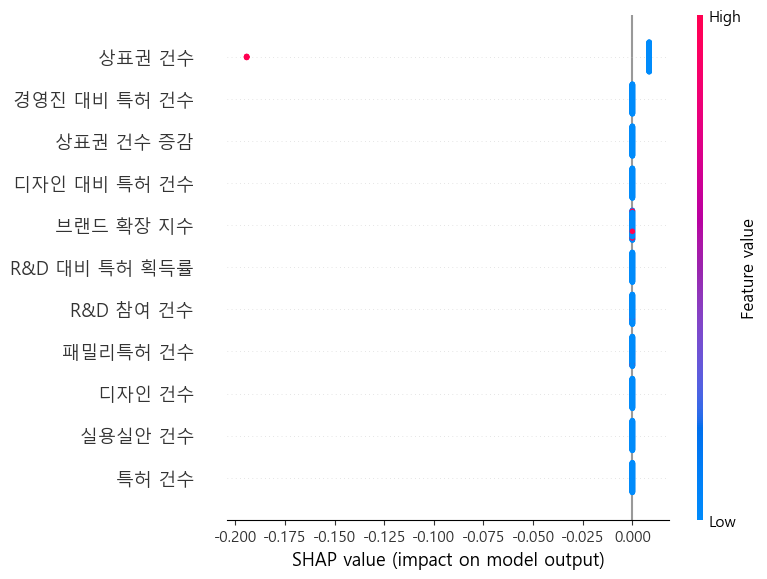

In [59]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train)

Glyph 8722 (\N{MINUS SIGN}) missing from current font.
Glyph 8722 (\N{MINUS SIGN}) missing from current font.


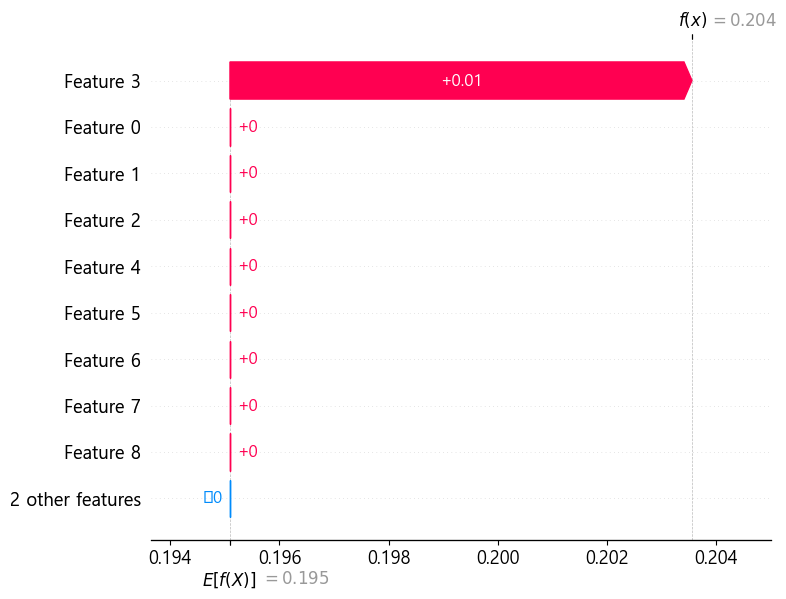

In [60]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[3])

In [61]:
# # compute SHAP values
# explainer2 = shap.Explainer(model, x_train.iloc[0:13])
# shap_values2 = explainer2(x_test.iloc[0:13])
# shap.plots.heatmap(shap_values2)

In [62]:
# # Bar형태로 표현 (Local)
# shap.plots.bar(shap_values2[:303])

In [63]:
# shap.initjs()
# # 총 13개 특성의 Shapley value를 절댓값 변환 후 각 특성마다 더함 -> np.argsort()는 작은 순서대로 정렬, 큰 순서대로 정렬하려면
# # 앞에 마이너스(-) 기호를 붙임
# top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# # 영향력 top 2 컬럼
# for i in range(5):
#     shap.dependence_plot(top_inds[i], shap_values, x_train)

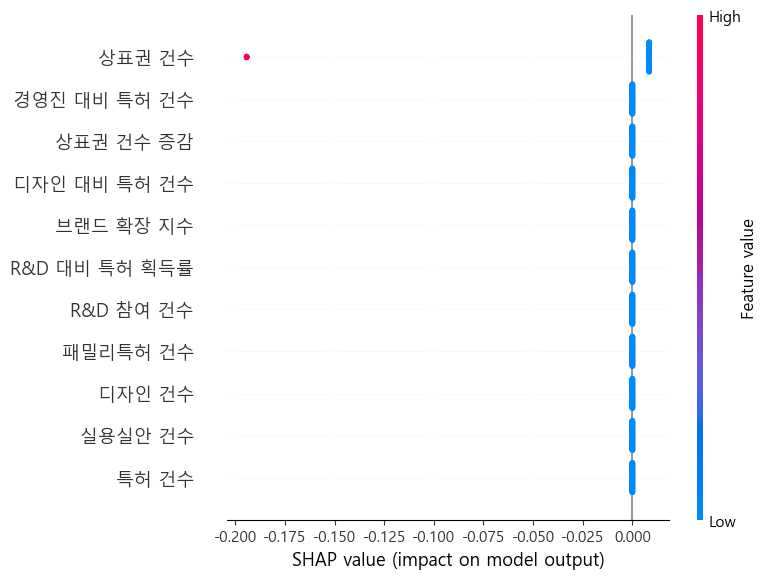

In [64]:
shap.summary_plot(shap_values, x_train)

In [65]:
# shap.summary_plot(shap_values2, x_train, plot_type='bar')

In [66]:
# new_data=pd.DataFrame(data=[[0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]],columns=['2021특허건수', '2021실용실안건수', '2021디자인건수', '2021상표권개수', '2021패밀리특허개수', '2021R&D건수',
#                   '특허 활용도','R&D 대비 특허 획득률','브랜드 확장 지수','디자인 대비 특허 건수','상표권 성장률','경영진 대비 특허 건수'])

In [67]:
# model.predict_proba(mask1)

## Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
import shap

# 비재무만
# x=ict_table.loc[:,['2021특허건수', '2021실용실안건수', '2021디자인건수', '2021상표권개수', '2021패밀리특허개수', 
#        '2021R&D건수']]
# '상표권 대비 판매 및 관리비', '특허 활용도','투자자산 성장률', '당좌 비율','자본 잉여금 비율'
# 비재무만+ 파생변수
x=ict_table.loc[:,['특허 건수', '실용실안 건수', '디자인 건수', '상표권 건수', '패밀리특허 건수', 'R&D 참여 건수',
                  'R&D 대비 특허 획득률','브랜드 확장 지수','상표권 건수 증감','경영진 대비 특허 건수']]
y=ict_table['binary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1234,stratify=y)


In [125]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_minmax = scaler.fit_transform(x)

# x=pd.DataFrame(df_minmax, columns = x.columns.tolist())
# x['2021상표권개수'].value_counts()

In [126]:
model=DecisionTreeClassifier(max_depth=5, min_samples_split=11)
model

DecisionTreeClassifier(max_depth=5, min_samples_split=11)

In [127]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=11)

In [128]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score # 정확도 : 전체 데이터 중에 얼마만큼 정확하게 분류했는지

In [129]:
# 6) 
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [130]:
print('학습 정확도 :' ,accuracy_score(y_train,y_train_pred))
print('테스트 정확도 :' ,accuracy_score(y_test,y_test_pred))

학습 정확도 : 0.6309794988610479
테스트 정확도 : 0.6054421768707483


In [131]:
evaluation_classification(model)

학습성능
              precision    recall  f1-score   support

           0       0.65      0.13      0.21       172
           1       0.63      0.96      0.76       267

    accuracy                           0.63       439
   macro avg       0.64      0.54      0.49       439
weighted avg       0.64      0.63      0.55       439

검증성능
              precision    recall  f1-score   support

           0       0.50      0.07      0.12       116
           1       0.61      0.96      0.75       178

    accuracy                           0.61       294
   macro avg       0.56      0.51      0.43       294
weighted avg       0.57      0.61      0.50       294



In [132]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

In [133]:
import numpy as np
max_num=np.argmax(model.predict_proba(x_train)[:,1])
max_num

214

In [134]:
shap.force_plot(explainer.expected_value[1], shap_values[1][max_num, :], x_train.iloc[max_num, :])

In [138]:
# shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_train)

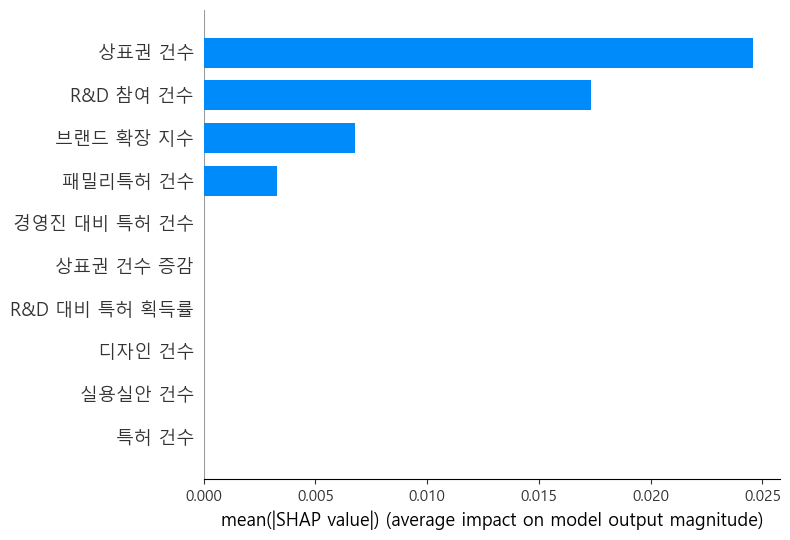

In [139]:
shap.summary_plot(shap_values[1], x_train, plot_type='bar')


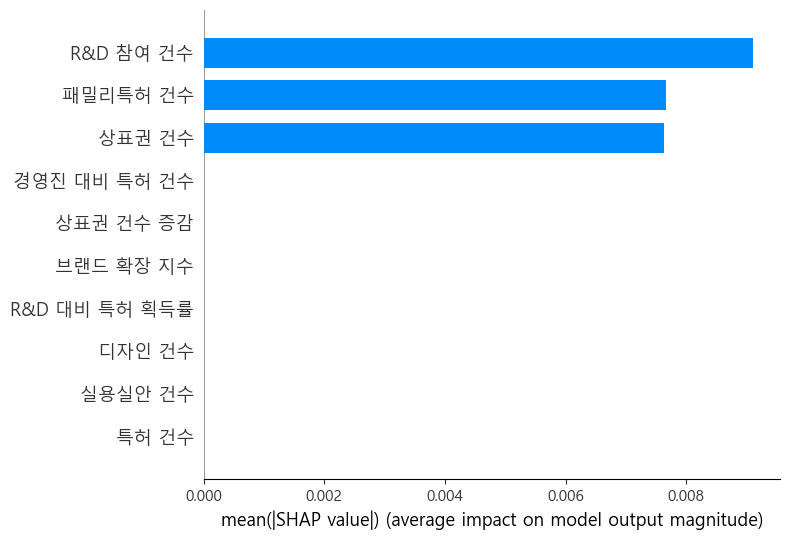

In [82]:
shap.summary_plot(shap_values[1], x_train, plot_type='bar')
